Take the green channel from each image and calculate the average of the pixel values in that channel.

In [1]:
import glob, cv2, numpy as np

gambars_ = glob.glob('image/*.jpg')
gambars = []

for gambar_ in gambars_:
    gambars.append(cv2.imread(gambar_))

f = open("output_mean_green.TXT", "w")

for c, gambar in enumerate(gambars):
    f.write(gambars_[c] + " : " + str(int(np.mean(gambar[:,:,1]))) + "\n")

f.close()

Create a histogram from each file (Red, Green, Blue).

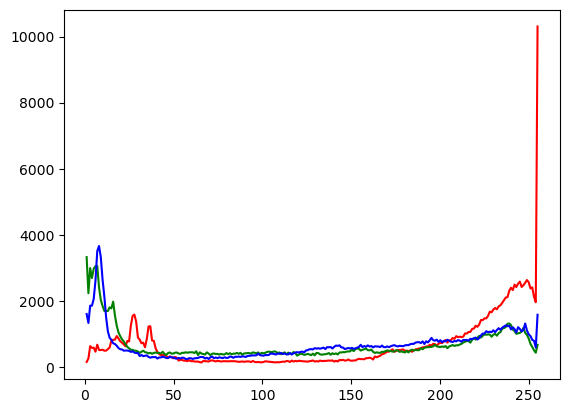

In [4]:
import os, matplotlib.pyplot as plt

# Specify the destination folder
output_folder = 'histogram_output'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for c, gambar in enumerate(gambars):
    histogram_merah, x = np.histogram(gambar[:,:,2], bins=256, range=(0, 255))
    histogram_hijau, x = np.histogram(gambar[:,:,1], bins=256, range=(0, 255))
    histogram_biru, x = np.histogram(gambar[:,:,0], bins=256, range=(0, 255))
    
    plt.clf()
    plt.plot(x[1:], histogram_merah, 'r-', x[1:], histogram_hijau, 'g', x[1:], histogram_biru, 'b')
    
    output_path = os.path.join(output_folder, 'histogram_' + str(c) + '.jpg')
    plt.savefig(output_path)

Gives a filter effect to perform edge detection on image files with kernel.

In [9]:
output_folder = 'filter_output'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

kernel = [
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]]
kernel = np.array(kernel)

for c, gambar in enumerate(gambars):
    hasil = cv2.filter2D(gambar, -1, kernel)
    output_path = os.path.join(output_folder, 'filter_' + str(c) + '.jpg')
    cv2.imwrite(output_path, hasil)

Gives a contrast effect with alpha 1.5 and a brightness effect with an addition of 20.

In [12]:
output_folder = 'contrast_brightness_output'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for c, gambar in enumerate(gambars):
    alpha = 1.5  # contrast
    beta = 20    # brightness
    hasil = cv2.convertScaleAbs(gambar, alpha=alpha, beta=beta)
    
    output_path = os.path.join(output_folder, 'contrast_brightness_' + str(c) + '.jpg')
    cv2.imwrite(output_path, hasil)

Count the number of faces that appear in each image.

In [17]:
haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface.xml')

f = open("number_of_faces.TXT", "w")

for c, gambar in enumerate(gambars):
    wajah = haar_cascade.detectMultiScale(gambar[:,:,0], scaleFactor=1.1, minNeighbors=5)
    f.write(gambars_[c] + " : " + str(len(wajah)) + "\n")
    
f.close()